**indicates a new technique learned from mentor feedback*

In [7]:
#Template to install a conda package in the current Jupyter kernel - just use conda within happyenv in anaconda prompt
import sys


#Template - install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy

**Set Directory**

In [8]:
%cd C:\Users\noahc\Jupyter\FirstSteps

C:\Users\noahc\Jupyter\FirstSteps


In [9]:
sys.path

['c:\\Users\\noahc\\Happy_Repo\\notebooks',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\python38.zip',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\DLLs',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv',
 '',
 'C:\\Users\\noahc\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\Pythonwin']

**Import packages**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

**Import data, perform visual check**

In [11]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head(6)
%cd C:\Users\noahc\Happy_Repo\notebooks

C:\Users\noahc\Happy_Repo\notebooks


In [12]:
df.shape

(126, 7)

In [13]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

**Data Visualization***

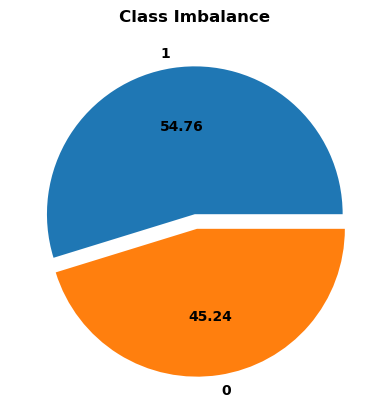

In [14]:
#Checking for dataset Imbalance (Slight imbalnce in dataset)
plt.pie(df['Y'].value_counts(),labels=df['Y'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

Text(0.5, 0.98, 'Visualizing Continuous Columns')

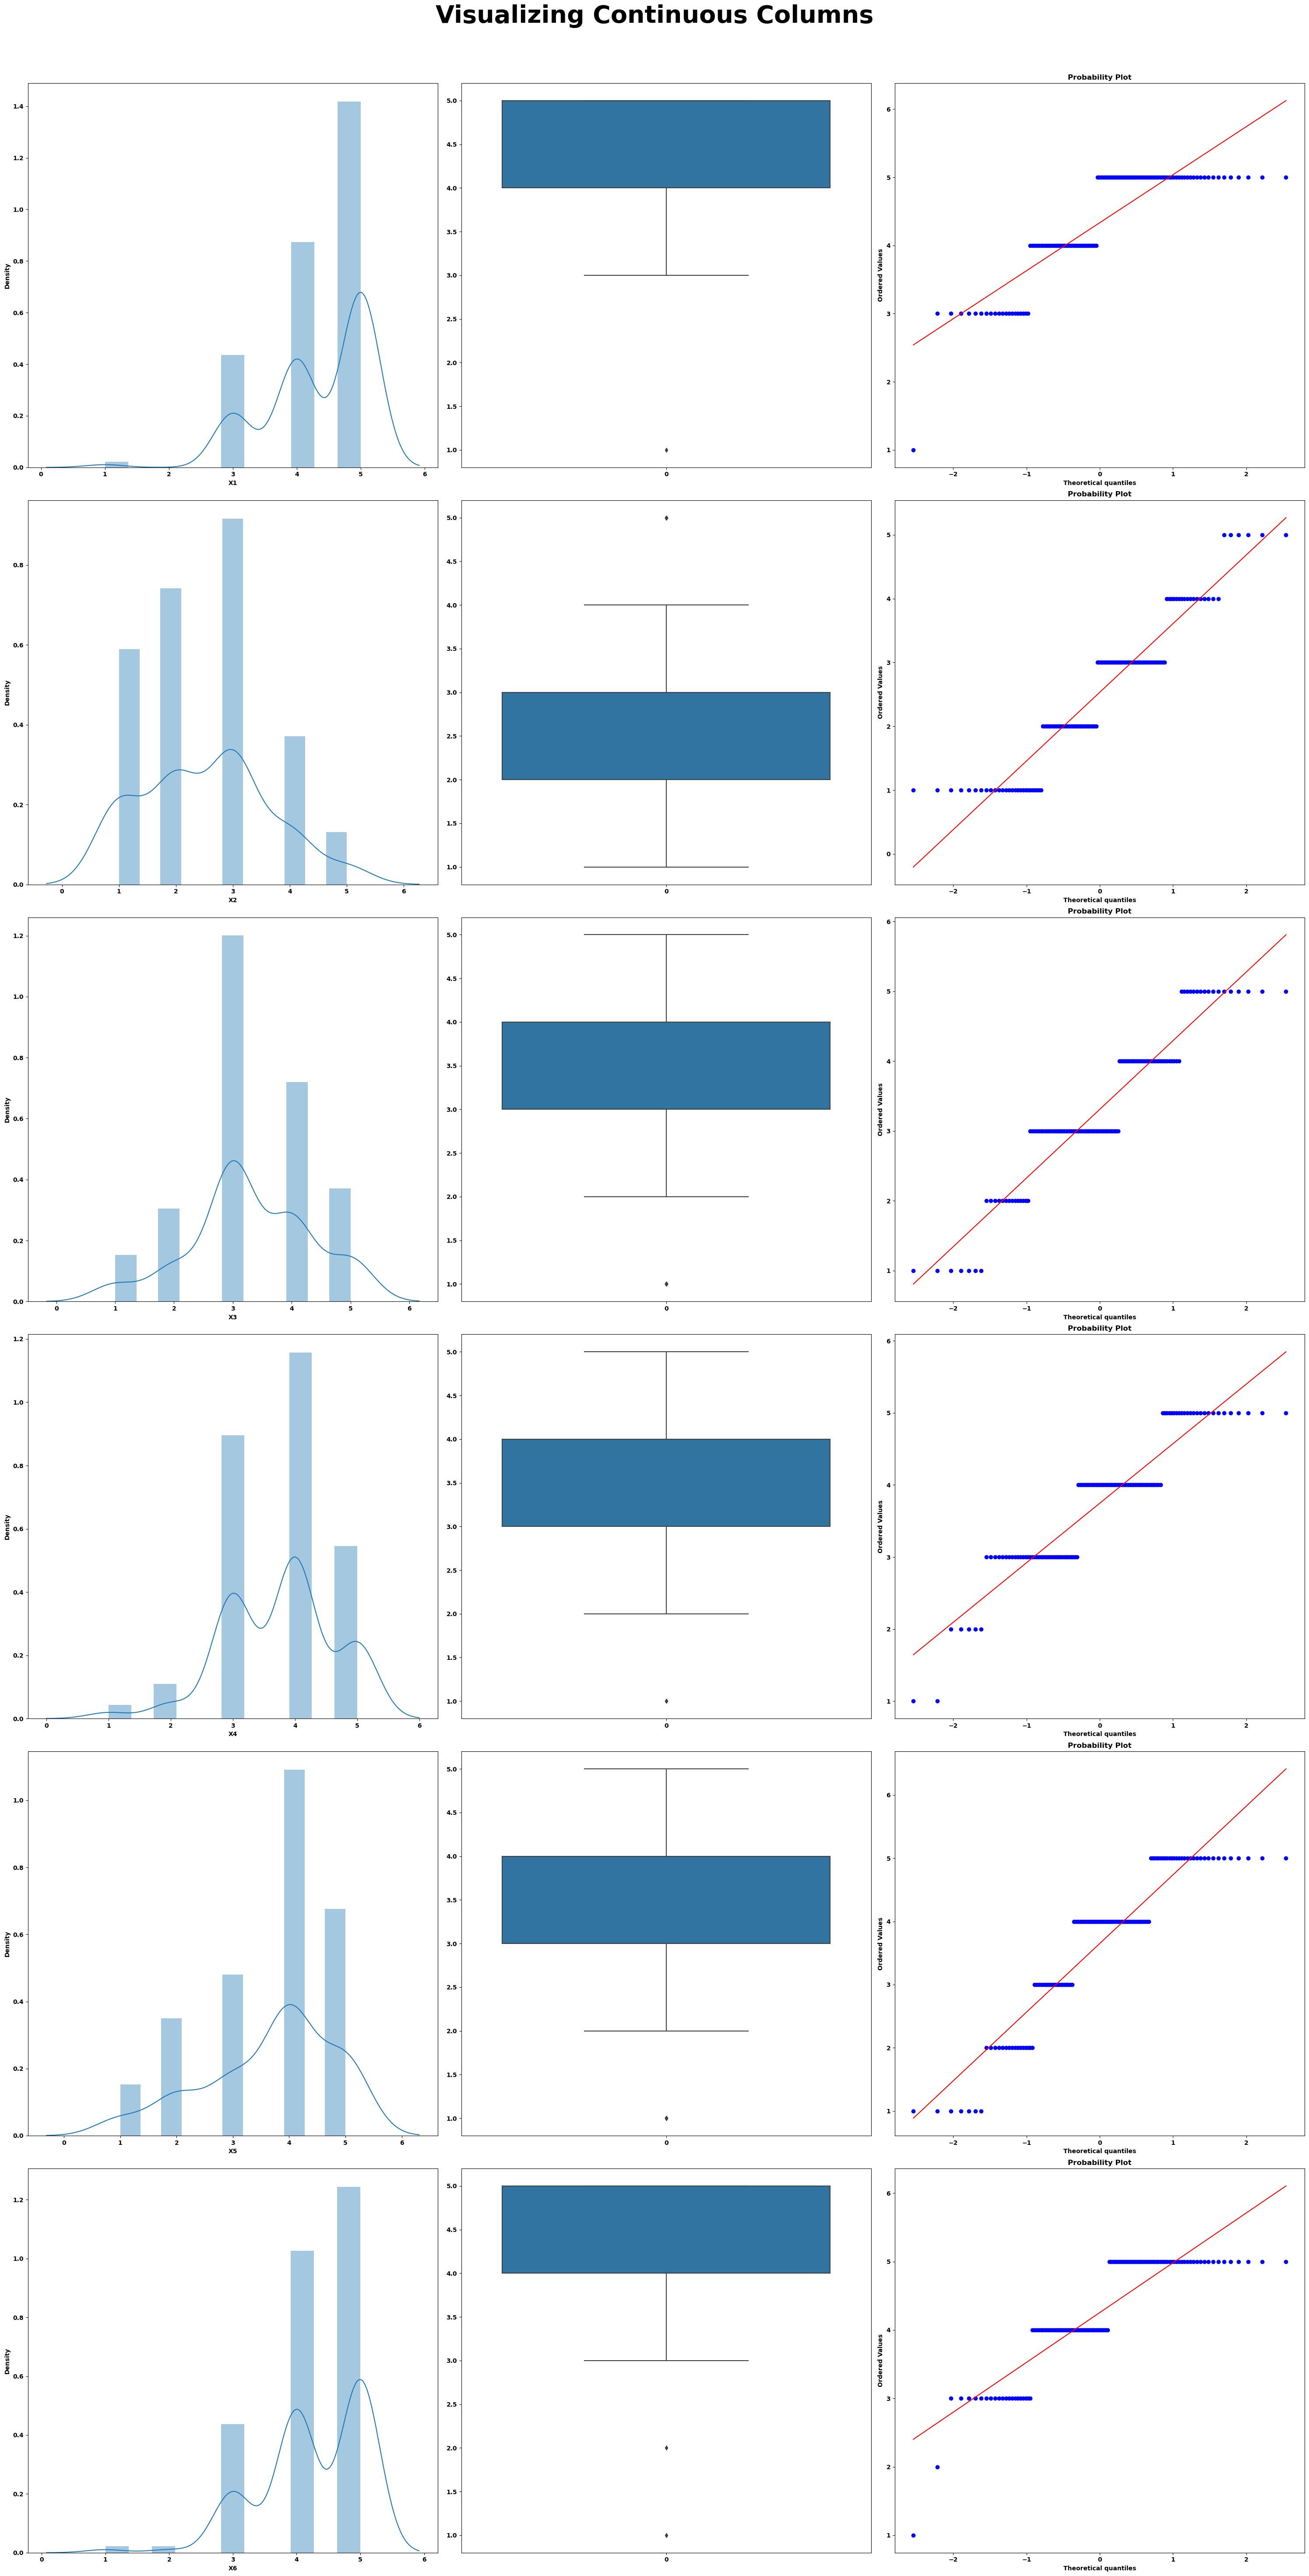

In [15]:
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(6,3,figsize=(30,60))
for index,i in enumerate(df.iloc[:,1:7]):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=40)

<AxesSubplot:>

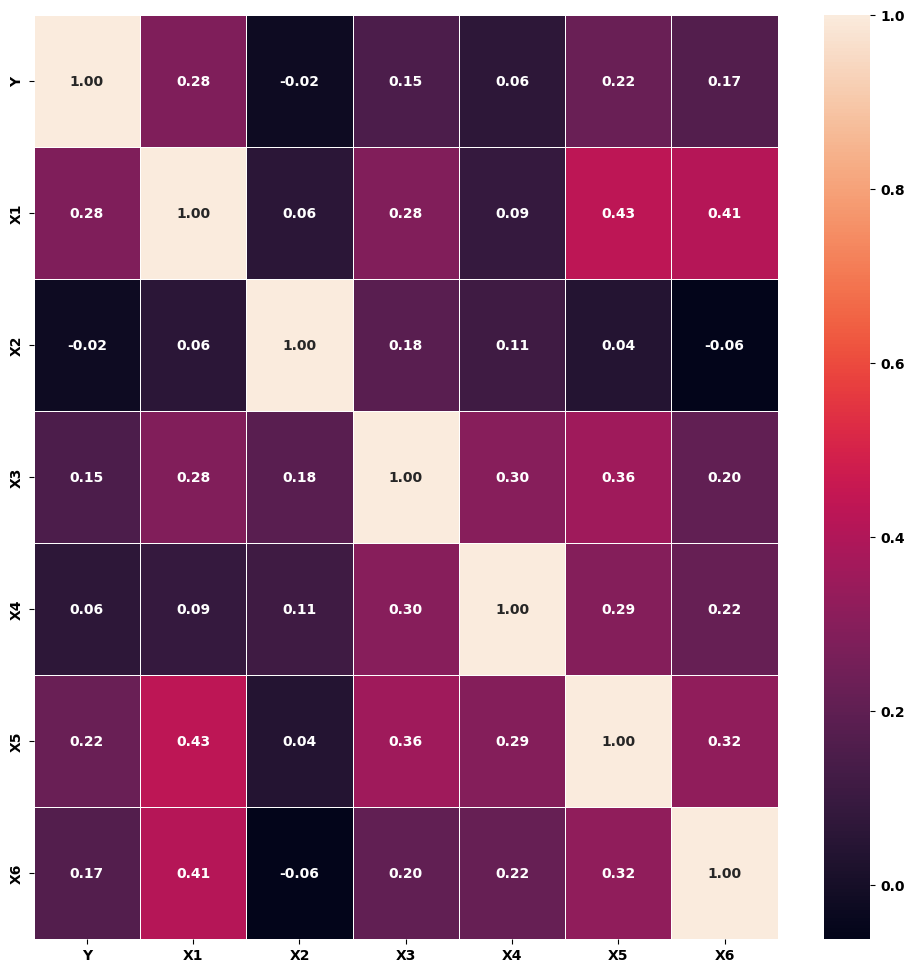

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

Observe that X2 - Y share little correlation (surprising given that X2 represents "the contents of my order were as I expected", one possible explanation is that orders are rarely incorrect. Still seems like it would contain useful information, as if it is very low the customer could not possibly be happy. Irrelevant for now but worth noting.)

**Remove some outliers**

In [17]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

            Y       X1        X2        X3        X4        X5        X6
0    1.100239  1.67332  0.421676  0.303642  0.291150  1.444166  0.315061
1    1.100239  1.67332  0.478852  0.303642  1.437552  0.305497  1.555612
2    0.908893  0.83666  0.421676  0.303642  0.855253  0.569335  0.925491
3    1.100239  0.83666  1.322205  0.303642  0.855253  0.569335  0.925491
4    1.100239  0.83666  1.322205  0.303642  0.855253  0.569335  0.925491
..        ...      ...       ...       ...       ...       ...       ...
121  0.908893  0.83666  0.478852  0.303642  0.291150  0.305497  1.555612
122  0.908893  0.83666  0.478852  0.303642  0.291150  1.444166  0.925491
123  0.908893  0.83666  0.421676  0.303642  0.291150  0.305497  0.925491
124  1.100239  0.41833  0.421676  0.303642  0.291150  0.305497  0.925491
125  1.100239  0.83666  0.421676  1.284640  1.437552  1.180328  0.925491

[126 rows x 7 columns]


*anything more than 3 standard deviations to be removed*

In [18]:
print(np.where(z > 3))

(array([ 34,  47, 119, 119], dtype=int64), array([4, 1, 4, 6], dtype=int64))


In [19]:
dfd = df.drop([34,47,119])

*Uncomment the cell beneath this one to perform worksheet without outliers(modified do not comment out)*

In [20]:
#df = dfd

**Manual Feature Selection**
based on subjective reasoning or qualitative observation (poor results - omitted)

**Automatic Feature Selection (Correlation as Scoring Metric)***

In [21]:
sliced_features = df.iloc[:,1:7]
sliced_labels = df['Y']
sliced_features.head()

#feature selection
fs = SelectKBest(score_func=f_classif, k=4)
X_selected = fs.fit_transform(sliced_features, sliced_labels)

#Checking which features where selected
filter = fs.get_support()
feat = np.array(sliced_features.columns)
print('Total Features ', feat)
print('Selected Features for training ',feat[filter])

#remove outliers
z = np.abs(stats.zscore(X_selected))
inputs = X_selected[(z<3).all(axis=1)]
target = sliced_labels[(z<3).all(axis=1)]

Total Features  ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']
Selected Features for training  ['X1' 'X3' 'X5' 'X6']


**Assign input and target variables (done already in revision)**

In [22]:
#inputs = df.drop('Y', axis='columns')
#target = df['Y']

**Scale data**

In [23]:
sc = StandardScaler()
inputs = sc.fit_transform(inputs)

**Train Test Split**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, random_state=42)

In [25]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
print(X_train.shape)
print(X_test.shape)


(106, 4)
(32, 4)


**Select features from split data**

In [26]:
#Scale all the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X1_train2 = sc.fit_transform(X_selected_train)
#X1_test2 = sc.transform(X_selected_test)

**XGBoost Classifier**

In [27]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)


In [28]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [29]:
xg.score(X_train, y_train)

0.6792452830188679

In [30]:
xg.score(X_test, y_test)

0.59375

In [31]:
xg_pred = xg.predict(inputs)

In [32]:
xg_test_pred = xg.predict(X_test)

In [33]:
xg.score(X_test, y_test)

0.59375

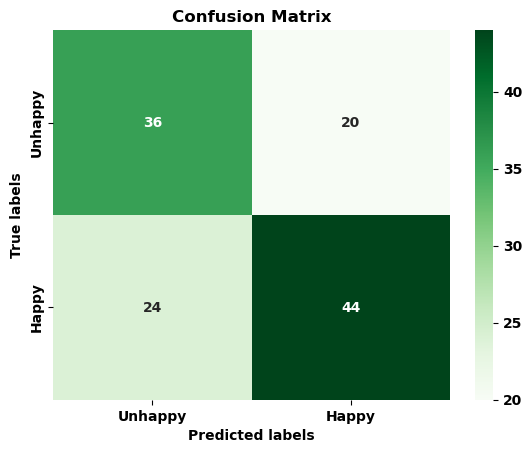

In [34]:
xg_cm = confusion_matrix(target, xg_pred)
ax= plt.subplot()
sns.heatmap(xg_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

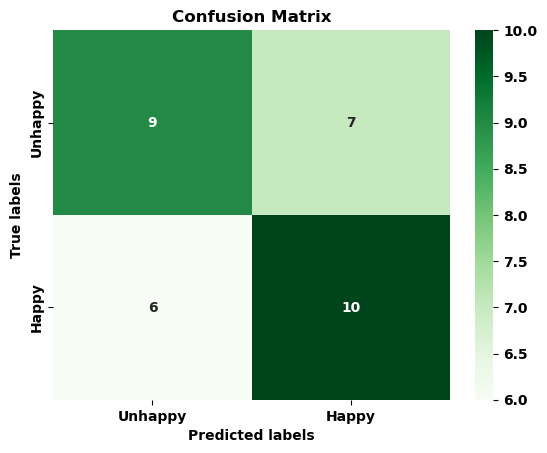

In [35]:
xg_test_cm = confusion_matrix(y_test, xg_test_pred)
ax= plt.subplot()
sns.heatmap(xg_test_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**SVM Classifier**

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.00095, gamma = 1e-15 )
svm.fit(X_train, y_train)

SVC(C=1.00095, gamma=1e-15, kernel='linear')

**Gradient Boost**

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.64      0.88      0.74        16

    accuracy                           0.69        32
   macro avg       0.72      0.69      0.68        32
weighted avg       0.72      0.69      0.68        32


Best Parameter: {'learning_rate': 0.1, 'n_estimators': 50}



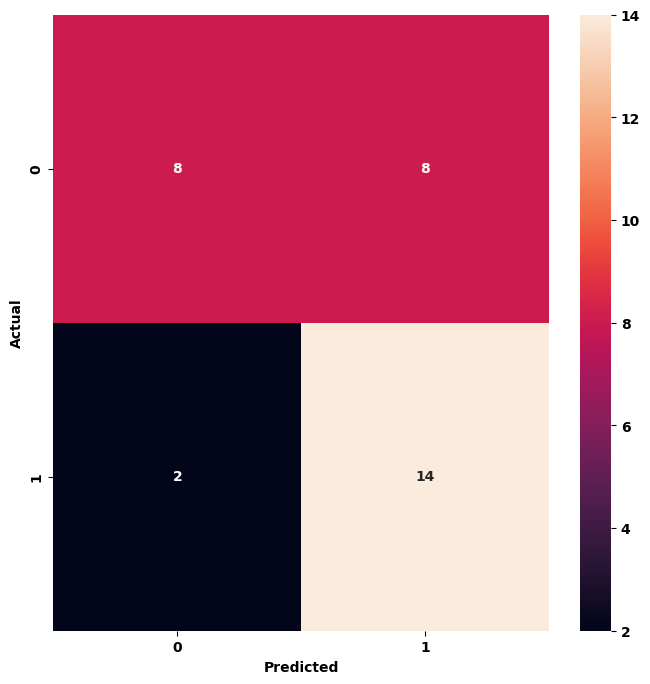

In [37]:
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.62      0.81      0.70        16

    accuracy                           0.66        32
   macro avg       0.67      0.66      0.65        32
weighted avg       0.67      0.66      0.65        32



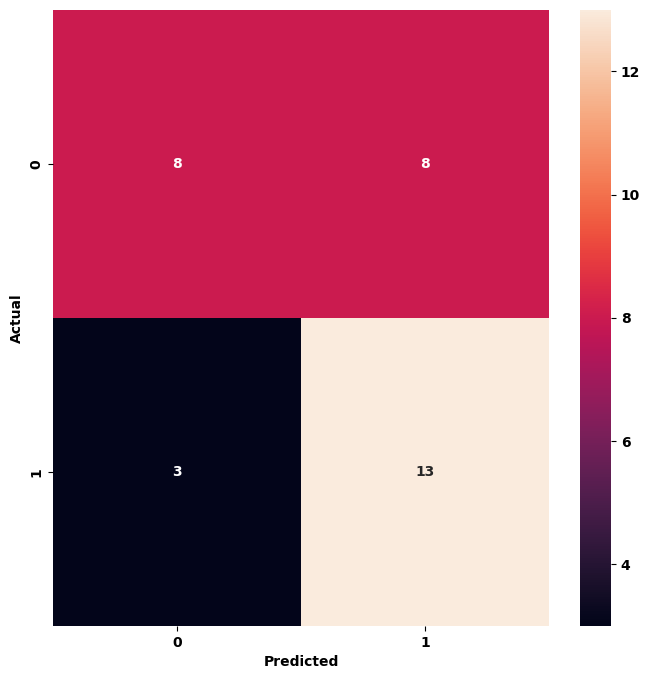

In [38]:
estimator = []
estimator.append(('RFC', 
                   RandomForestClassifier(n_estimators= 300, max_features= 'log2', max_depth= 8)))
estimator.append(('SVC', SVC(kernel='rbf', gamma= 1, C=100)))
estimator.append(('GBC', GradientBoostingClassifier(n_estimators = 50, learning_rate =0.05)))
            
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train,y_train)
y_pred= vot_hard.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

In [39]:
# defining parameter range
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [.01,.1, 1, 10,100,1000],'degree':[2,3], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['poly']}  
 ]

In [40]:
svm.score(X_test, y_test)

0.46875

In [41]:
svm.score(X_train, y_train)

0.6415094339622641

In [42]:
svm_pred = svm.predict(inputs)

In [43]:
svm_test_pred = svm.predict(X_test)

In [44]:
svm.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

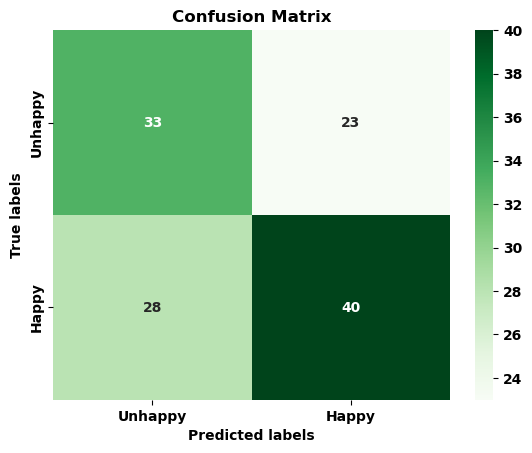

In [45]:
svm_cm = confusion_matrix(target, svm_pred)
ax= plt.subplot()
sns.heatmap(svm_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

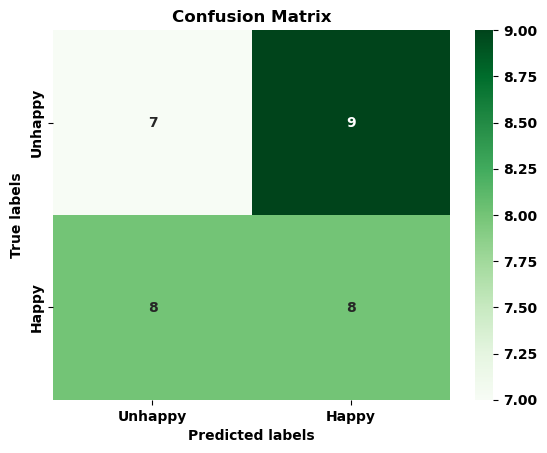

In [46]:
svm_test_cm = confusion_matrix(y_test, svm_test_pred)
ax= plt.subplot()
sns.heatmap(svm_test_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**End of fitted models**
rest of notebook is scratch

**Poly kernel for SVM (poor performance)**

In [47]:
polysvm= SVC(kernel = 'poly', C=1, gamma=.8, degree = 4)

In [48]:
polysvm.fit(X_train, y_train)

SVC(C=1, degree=4, gamma=0.8, kernel='poly')

In [49]:
polysvm.score(X_test, y_test)

0.5

In [50]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(X_train_sc, y_train)

print(isf.score_samples(X_train))

NameError: name 'X_train_sc' is not defined

In [ ]:
outliers=isf.fit_predict(X_train)

In [ ]:
mask = outliers != -1

In [ ]:
X_train_no_outliers, y_train_no_outliers = X_train[mask, :], y_train[mask]

**XG Without outliers**

In [ ]:
xg.fit(X_train_no_outliers, y_train_no_outliers)

In [ ]:
xg.score(X_test_sc, y_test)

In [ ]:
"""
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.025,0.05,0.075], #so called `eta` value
              'max_depth': [2,3,4,5,6],
              'min_child_weight': [5,6,7,8,9],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'missing':[-999],
              'seed': [1337]}

XGB = XGBClassifier(random_state=0)
parameter_grid = {'learning_rate': [0.025,0.05,0.075],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)

grid_search_XGB = GridSearchCV(XGB,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                            n_jobs=-1,
                            verbose=0)

grid_search_XGB.fit(X_train_sc, y_train)
print('Best score: {}'.format(grid_search_XGB.best_score_))
print('Best parameters: {}'.format(grid_search_XGB.best_params_))
"""

In [ ]:
"""
xg_grid = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
"""

In [ ]:
#xg_grid.fit(X_train_sc, y_train)

In [ ]:
#xg_grid.score(X_test_sc,y_test)

In [ ]:
#xg_grid.best_params_

In [ ]:
y_train.value_counts().plot(kind='bar', title='Count (target)');